[0.0625 0.25   0.375  0.25   0.0625]


C:\Users\abdal\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


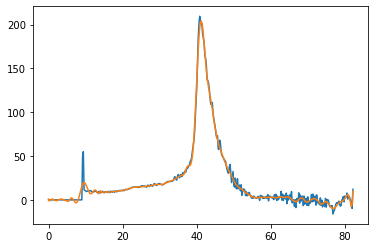

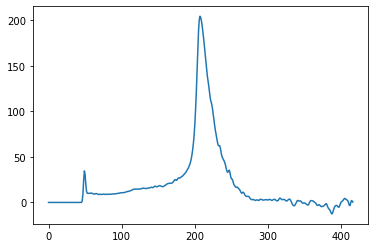

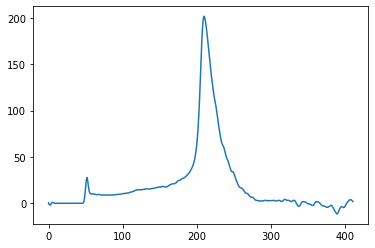

In [8]:
import numpy as np
import pandas as pd 
import xlsxwriter as xlsw
from scipy.signal import savgol_filter
from matplotlib import pyplot as plt

#This code reads data from an excel sheet und computes the derivative with respect to time. It then uses different approaches 
#to smoothen the resulting curve. 


read_file = pd.read_excel('Mappe1.xlsx')
csv_file = read_file.to_csv()
df1= pd.read_excel('Mappe1.xlsx', usecols="A")
df = pd.read_excel('Mappe1.xlsx', usecols="B")

time = np.array(df1)[::10,0]
data = np.array(df)[::10,0]
derivative= np.gradient(data,time)

#The first uses the function savgol_filter from the library scipy
smoothed_data= savgol_filter(derivative, 51,10)
plt.plot(time,derivative)
plt.plot(time,smoothed_data)
d={'Time': time, 'Original Data': data, 'Derivative': derivative}
df = pd.DataFrame(d)
df.to_excel("output.xlsx")  

#The second approach transforms the derivative in the Fourier-domain and sets the coefficients of high frequencies to zero.
def low_pass_filter(signal):
    f1=plt.figure()
    f2=plt.figure()
    ax1=f1.add_subplot()
    ax2=f2.add_subplot(111)
    result = np.fft.fft(signal)
    norm=[]
    for index,value in enumerate(result):
        abs_value = np.absolute(value)
        norm.append(abs_value)
        if (index!=0 and abs_value>5000):
            result[index]=0
    filtered_signal=np.fft.ifft(result)
    ax1.plot(norm)
    ax2.plot(signal)
    ax2.plot(filtered_signal)
    plt.show()
    print(np.array(norm).max())

#The binomial_coefficient computes the binomial coefficients using a recursive approach
def binomial_coefficient(n,p):
    if p==0 or p==n:
        return 1
    else:
        return binomial_coefficient(n-1,p)+binomial_coefficient(n-1,p-1)

    #This function generates an array consisting of a binonial kernel which is used afterwards as a low-pass filter
def binomial_kernel(n):
    result=[]
    for i in range(0,n+1):
        result.append(binomial_coefficient(n,i))
    return result/np.power(2,n)

#This functions omits high frequencies in the Fourier-domain by multiplying the signal with the fourier-transform of a binomial
#kernel
def lowpass_filter_FD(signal,n):
    h=binomial_kernel(n)
    h=np.append(h,[0 for i in range(signal.size - n-1)])
    H=np.fft.fft(h)
    Signal=np.fft.fft(signal)
    product=H*Signal
    return np.fft.ifft(product)

#This function is the time-domain counterpart of the previous function
def smoothing(signal,n):
    return np.convolve(signal, binomial_kernel(n))

def test():
    print(binomial_kernel(4))
    signal=np.sin(np.arange(1,100,0.1))
    f3=plt.figure()
    f4=plt.figure()
    ax4=f4.add_subplot(111)
    ax3=f3.add_subplot(111)
    ax3.plot(smoothing(derivative,5))
    ax4.plot(lowpass_filter_FD(derivative,10))

test()







